# Exploratory Data Analysis (EDA) – Titanic Dataset

## Description
This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset
to understand patterns, trends, and insights related to passenger survival.
We use Python libraries such as Pandas, Matplotlib, and Seaborn for analysis
and visualization.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


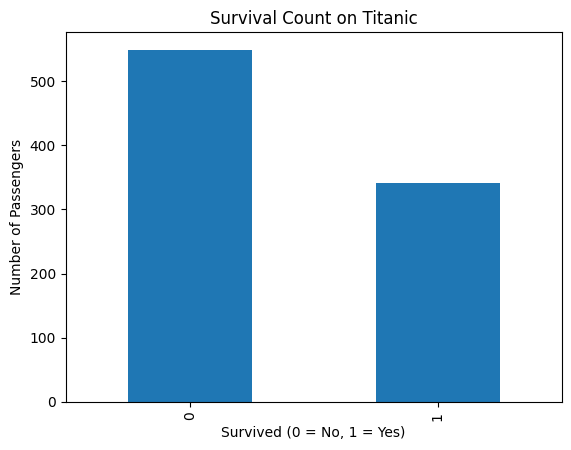

In [5]:
# Survival count
df['Survived'].value_counts().plot(kind='bar')

plt.title("Survival Count on Titanic")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

In [6]:
# Shape of dataset
df.shape

(891, 12)

In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Survival distribution
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

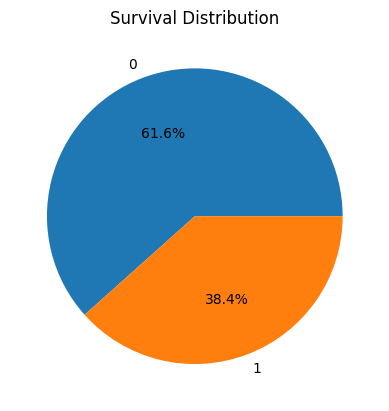

In [11]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Survival Distribution")
plt.ylabel("")
plt.show()

In [12]:
# Survival by gender
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


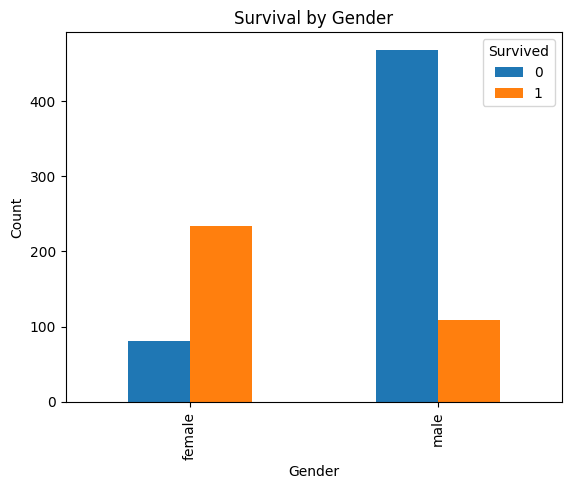

In [13]:
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [14]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


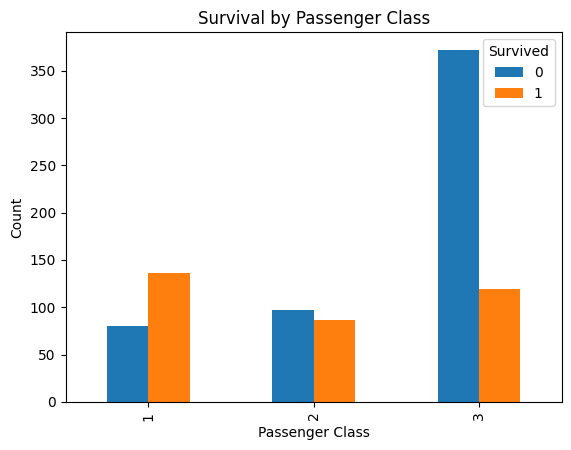

In [15]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

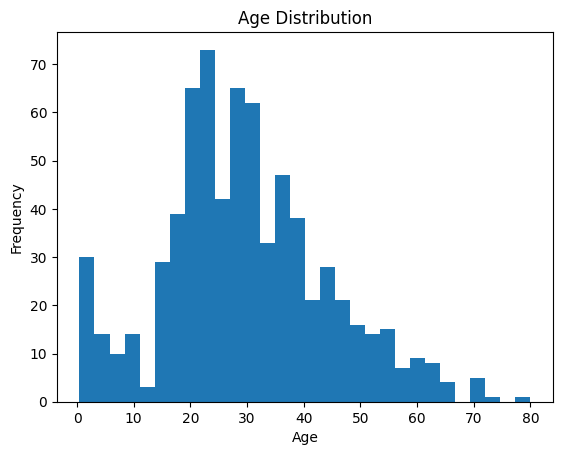

In [16]:
df['Age'].plot(kind='hist', bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

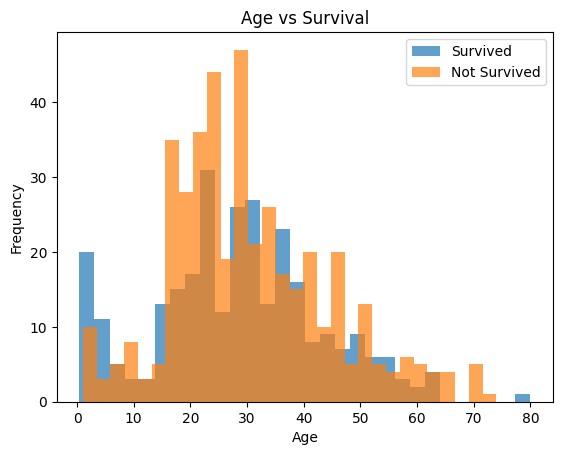

In [17]:
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, alpha=0.7, label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, alpha=0.7, label='Not Survived')
plt.legend()
plt.title("Age vs Survival")
plt.xlabel("Age")
plt.show()

## Exploratory Data Analysis – Key Insights

1. The dataset contains missing values, especially in the `Age` and `Cabin` columns.
   - `Age` can be imputed.
   - `Cabin` has too many missing values and can be ignored.

2. Survival distribution shows that most passengers did not survive,
   indicating class imbalance in the target variable.

3. Gender played a major role in survival:
   - Female passengers had a significantly higher survival rate than males.

4. Passenger class had a strong impact on survival:
   - First-class passengers had better survival chances.
   - Third-class passengers were the most affected.

5. Age analysis shows:
   - Children had higher survival probability.
   - Elderly passengers had lower survival chances.

### Conclusion
The EDA reveals that **gender, passenger class, and age** were the most
important factors influencing survival on the Titanic.